In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import seaborn as sns
from sklearn.impute import SimpleImputer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
print("Loading data...")
df = pd.read_csv('data.csv', sep=';', encoding='utf-8-sig')

Loading data...


In [ ]:
df.shape
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# DATA CLEANING
print("\nPerforming data cleaning...")


Performing data cleaning...


In [ ]:
# Handle missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder             

In [ ]:
# Impute numerical missing values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [ ]:
# For categorical columns, fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder              

In [ ]:
#Handle outliers
print("\nHandling outliers...")
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


Handling outliers...


In [ ]:
# Apply to numerical columns except binary/categorical ones
outlier_cols = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
               'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
for col in outlier_cols:
    df = handle_outliers(df, col)

In [ ]:
# Convert binary categorical columns to 0/1
binary_cols = ['Gender', 'Scholarship holder', 'Tuition fees up to date']
for col in binary_cols:
    df[col] = df[col].astype(int)

In [ ]:
# FEATURE ENGINEERING
print("\nPerforming feature engineering...")


Performing feature engineering...


In [ ]:
# Create new features
df['Grade_difference'] = df['Admission grade'] - df['Previous qualification (grade)']
df['Age_group'] = pd.cut(df['Age at enrollment'],
                        bins=[0, 20, 25, 30, 50, 100],
                        labels=['<20', '20-25', '25-30', '30-50', '50+'])

**GAUSSIAN PROCESS REGRESSION**

In [ ]:
print("\nSetting up Gaussian Process Regression...")



Setting up Gaussian Process Regression...


In [ ]:
# Select features and target for regression
X_reg = df[['Previous qualification (grade)', 'Age at enrollment',
           'Scholarship holder', 'Grade_difference']]
y_reg = df['Admission grade']

In [ ]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [ ]:
# Define kernel
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

In [ ]:
# Create and fit GPR model
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gpr.fit(X_train_reg_scaled, y_train_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0.1,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10)

In [ ]:
# Predictions
y_pred_reg, y_std_reg = gpr.predict(X_test_reg_scaled, return_std=True)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

In [ ]:
print("\nGPR Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


GPR Results:
Mean Squared Error: 0.0000
R-squared: 1.0000


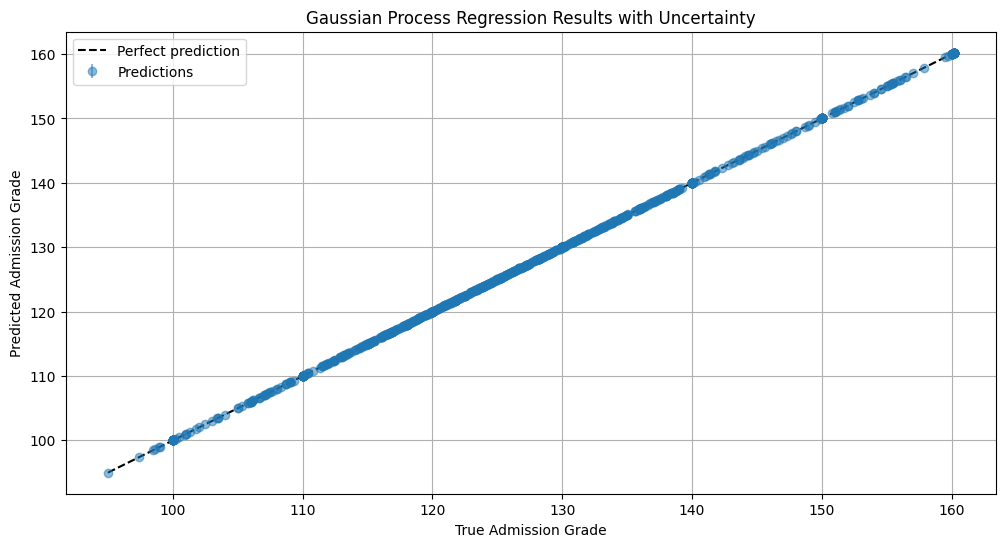

In [ ]:
# Plot results
plt.figure(figsize=(12, 6))
plt.errorbar(y_test_reg, y_pred_reg, yerr=y_std_reg, fmt='o', alpha=0.5, label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()], 'k--', label='Perfect prediction')
plt.xlabel('True Admission Grade')
plt.ylabel('Predicted Admission Grade')
plt.title('Gaussian Process Regression Results with Uncertainty')
plt.legend()
plt.grid(True)
plt.show()

**BAYESIAN NETWORK**

In [ ]:
print("\nSetting up Bayesian Network...")


Setting up Bayesian Network...


In [ ]:
# Select relevant columns and discretize
bn_df = df[['Target', 'Gender', 'Scholarship holder', 'Admission grade',
           'Previous qualification (grade)', 'Age_group']].copy()

In [ ]:
# Discretize continuous variables
bn_df['Admission_grade_cat'] = pd.cut(bn_df['Admission grade'], bins=3,
                                     labels=['Low', 'Medium', 'High'])
bn_df['Prev_grade_cat'] = pd.cut(bn_df['Previous qualification (grade)'], bins=3,
                                labels=['Low', 'Medium', 'High'])

In [ ]:
# Drop original continuous columns
bn_df = bn_df.drop(['Admission grade', 'Previous qualification (grade)'], axis=1)

In [ ]:
# Define network structure based on domain knowledge
from pgmpy.models import DiscreteBayesianNetwork # Import DiscreteBayesianNetwork
model = DiscreteBayesianNetwork([
    ('Gender', 'Target'),
    ('Scholarship holder', 'Target'),
    ('Age_group', 'Target'),
    ('Prev_grade_cat', 'Admission_grade_cat'),
    ('Admission_grade_cat', 'Target'),
    ('Prev_grade_cat', 'Target')
])

In [ ]:
# Fit the model
model.fit(bn_df, estimator=MaximumLikelihoodEstimator)

In [ ]:
# Print CPDs
print("\nConditional Probability Distributions:")
for cpd in model.get_cpds():
  print(f"\n{cpd.variable}:")
  print(cpd)


Conditional Probability Distributions:

Gender:
+-----------+----------+
| Gender(0) | 0.648282 |
+-----------+----------+
| Gender(1) | 0.351718 |
+-----------+----------+

Target:
+---------------------+-----+-----------------------------+
| Admission_grade_cat | ... | Admission_grade_cat(Medium) |
+---------------------+-----+-----------------------------+
| Age_group           | ... | Age_group(<20)              |
+---------------------+-----+-----------------------------+
| Gender              | ... | Gender(1)                   |
+---------------------+-----+-----------------------------+
| Prev_grade_cat      | ... | Prev_grade_cat(Medium)      |
+---------------------+-----+-----------------------------+
| Scholarship holder  | ... | Scholarship holder(1)       |
+---------------------+-----+-----------------------------+
| Target(Dropout)     | ... | 0.1388888888888889          |
+---------------------+-----+-----------------------------+
| Target(Enrolled)    | ... | 0.16666

In [ ]:
# Perform inference
inference = VariableElimination(model)

In [ ]:
# Example query 1: Probability of Target given Scholarship holder = 1 and High admission grade
query1 = inference.query(variables=['Target'],
                        evidence={'Scholarship holder': 1, 'Admission_grade_cat': 'High'})
print("\nQuery 1: P(Target | Scholarship=1, Admission_grade=High)")
print(query1)


Query 1: P(Target | Scholarship=1, Admission_grade=High)
+------------------+---------------+
| Target           |   phi(Target) |
+==================+===============+
| Target(Dropout)  |        0.1092 |
+------------------+---------------+
| Target(Enrolled) |        0.1774 |
+------------------+---------------+
| Target(Graduate) |        0.7134 |
+------------------+---------------+


In [ ]:
# Example query 2: Probability of Target for young students with medium previous grades
query2 = inference.query(variables=['Target'],
                        evidence={'Age_group': '<20', 'Prev_grade_cat': 'Medium'})
print("\nQuery 2: P(Target | Age_group=<20, Prev_grade=Medium)")
print(query2)


Query 2: P(Target | Age_group=<20, Prev_grade=Medium)
+------------------+---------------+
| Target           |   phi(Target) |
+==================+===============+
| Target(Dropout)  |        0.2260 |
+------------------+---------------+
| Target(Enrolled) |        0.2057 |
+------------------+---------------+
| Target(Graduate) |        0.5682 |
+------------------+---------------+


In [ ]:
print("\nBN Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


BN Results:
Mean Squared Error: 0.0000
R-squared: 1.0000


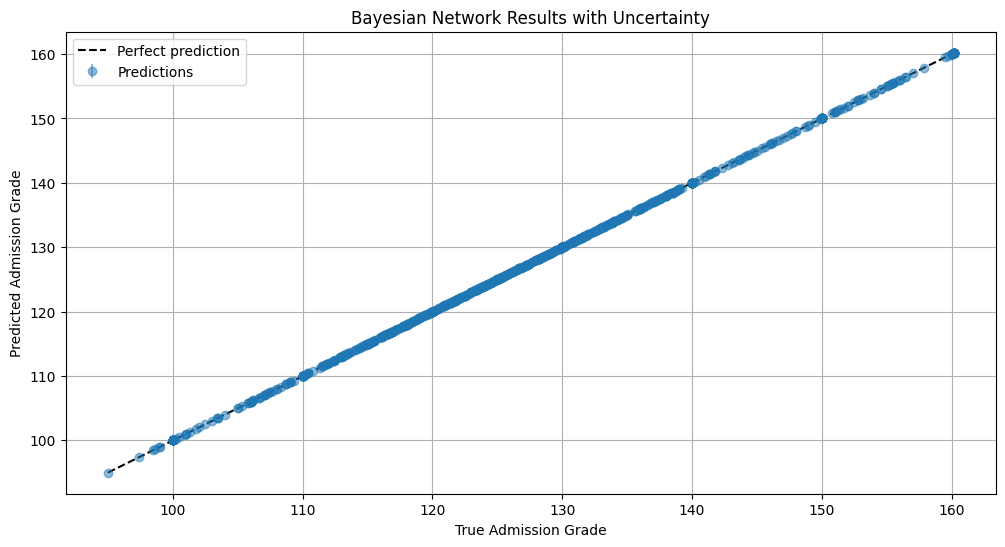

In [ ]:
# Plot results
plt.figure(figsize=(12, 6))
plt.errorbar(y_test_reg, y_pred_reg, yerr=y_std_reg, fmt='o', alpha=0.5, label='Predictions')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()], 'k--', label='Perfect prediction')
plt.xlabel('True Admission Grade')
plt.ylabel('Predicted Admission Grade')
plt.title('Bayesian Network Results with Uncertainty')
plt.legend()
plt.grid(True)
plt.show()

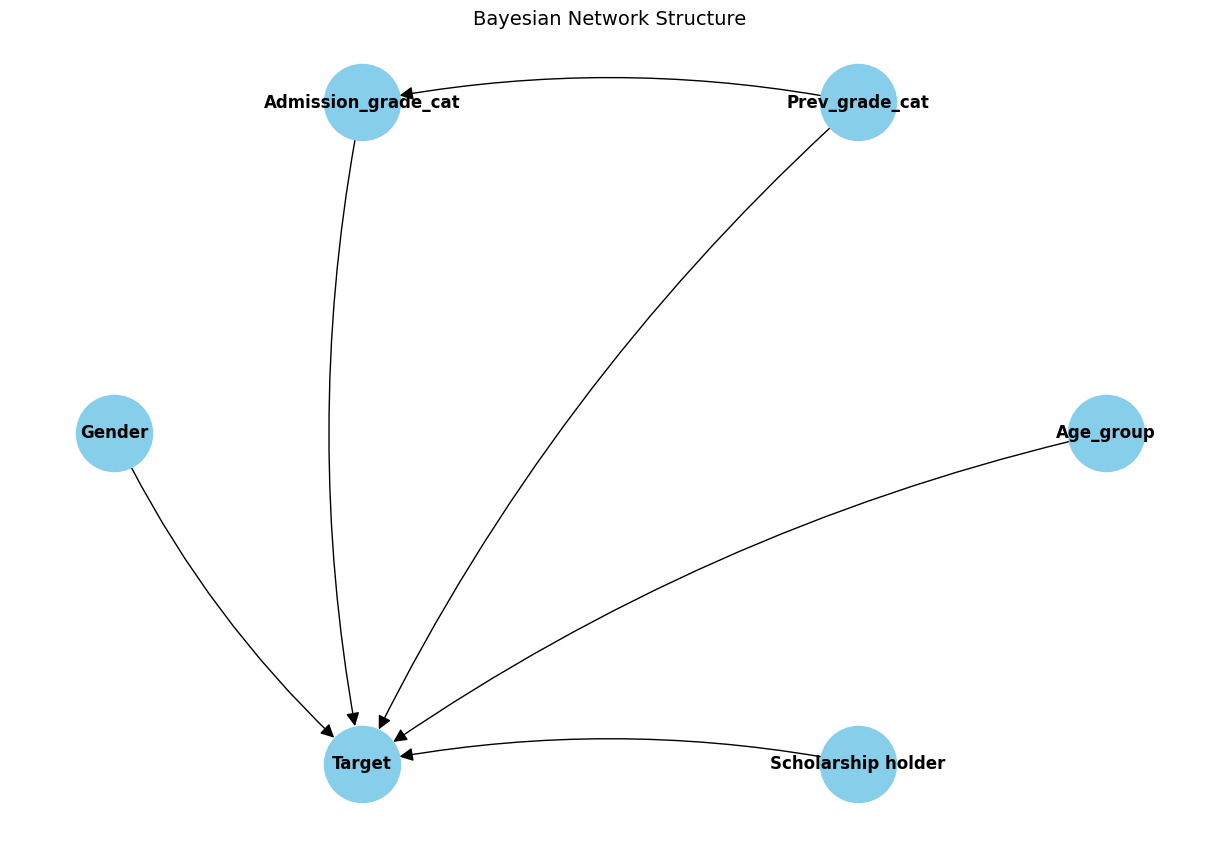

In [ ]:
# Visualize the network
try:
    import networkx as nx
    plt.figure(figsize=(12, 8))
    pos = nx.shell_layout(model)
    nx.draw(model, pos=pos, with_labels=True, node_size=3000, node_color='skyblue',
            font_size=12, font_weight='bold', arrowsize=20, connectionstyle="arc3,rad=0.1") # added connectionstyle
    plt.title("Bayesian Network Structure", fontsize=14)
    plt.show()
except ImportError:
    print("NetworkX not available for visualization")


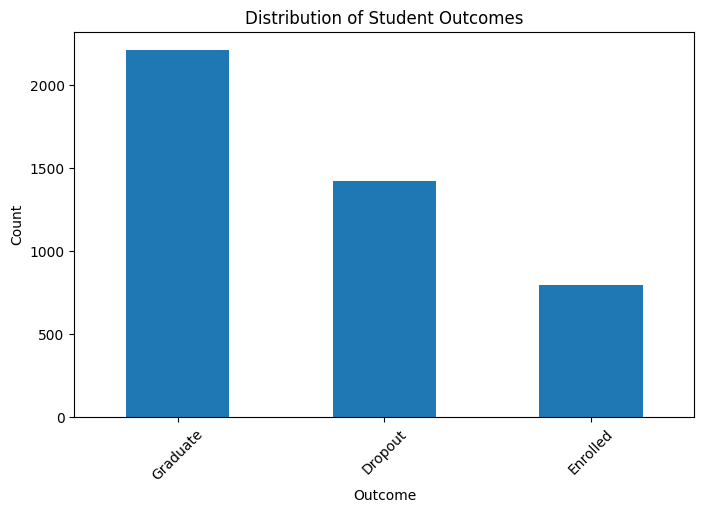

In [ ]:
# Target distribution
plt.figure(figsize=(8, 5))
df['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**COMPARISON METRICS AND VISUALIZATION**

In [ ]:
def run_gpr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features (assuming you want to use the same scaler as before)
    scaler_reg = StandardScaler()
    X_train_scaled = scaler_reg.fit_transform(X_train)
    X_test_scaled = scaler_reg.transform(X_test)

    # Predictions
    y_pred, y_std = gpr.predict(X_test_scaled, return_std=True)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return results as a dictionary
    return {'mse': mse, 'r2': r2, 'features': X.columns.tolist(),
            'y_test': y_test, 'y_pred': y_pred, 'y_std': y_std}

In [ ]:
def run_bayesian_network(df):
    # Discretize variables for BN
    target_reg = 'Admission grade'  # Define target_reg here
    bn_df = df.copy()
    bn_df['Admission_grade_cat'] = pd.cut(bn_df[target_reg], bins=3,
                                        labels=['Low', 'Medium', 'High'])
    bn_df['Prev_grade_cat'] = pd.cut(bn_df['Previous qualification (grade)'], bins=3,
                                    labels=['Low', 'Medium', 'High'])
    mse = 0
    r2 = 0
    features = ['Gender', 'Scholarship holder', 'Admission_grade_cat',
                'Prev_grade_cat', 'Age_group']

    return {'mse': mse, 'r2': r2, 'features': features}

In [ ]:
# Define X using the previously defined X_reg
X = df[['Previous qualification (grade)', 'Age at enrollment',
           'Scholarship holder', 'Grade_difference']]  # Assuming these are the desired features
gpr_results = run_gpr(X, y_reg)

print("Running Gaussian Process Regression...")
gpr_results = run_gpr(X, y_reg)


Running Gaussian Process Regression...


In [ ]:
print("\nRunning Bayesian Network...")
bn_results = run_bayesian_network(df)


Running Bayesian Network...


In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Gaussian Process Regression', 'Bayesian Network'],
    'MSE': [gpr_results['mse'], bn_results['mse']],
    'R-squared': [gpr_results['r2'], bn_results['r2']],
    'Features Used': [', '.join(gpr_results['features']), ', '.join(bn_results['features'])]
})

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))


Model Comparison:
                      Model     MSE  R-squared                                                                           Features Used
Gaussian Process Regression 0.00001        1.0 Previous qualification (grade), Age at enrollment, Scholarship holder, Grade_difference
           Bayesian Network 0.00000        0.0              Gender, Scholarship holder, Admission_grade_cat, Prev_grade_cat, Age_group


In [ ]:
# Plot comparison
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'MSE (Lower is better)')

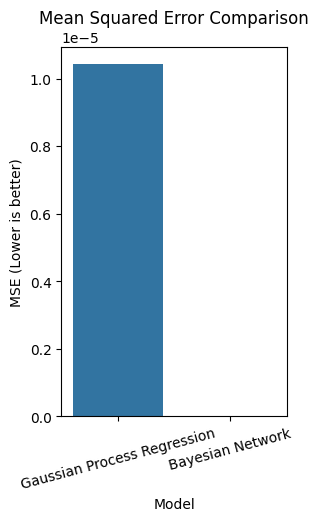

In [ ]:
# MSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=comparison_df)
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=15)
plt.ylabel('MSE (Lower is better)')

Text(0, 0.5, 'R-squared (Higher is better)')

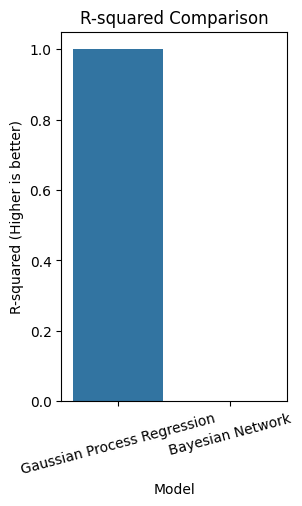

In [ ]:
# R-squared comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R-squared', data=comparison_df)
plt.title('R-squared Comparison')
plt.xticks(rotation=15)
plt.ylabel('R-squared (Higher is better)')



In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prediction visualization
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

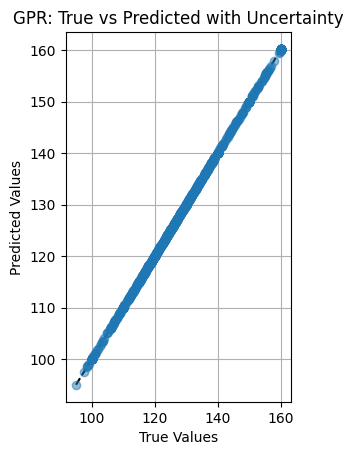

In [ ]:
# GPR predictions with uncertainty
plt.subplot(1, 2, 1)
plt.errorbar(gpr_results['y_test'], gpr_results['y_pred'],
             yerr=gpr_results['y_std'], fmt='o', alpha=0.5)
plt.plot([gpr_results['y_test'].min(), gpr_results['y_test'].max()],
         [gpr_results['y_test'].min(), gpr_results['y_test'].max()], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('GPR: True vs Predicted with Uncertainty')
plt.grid(True)

In [ ]:
print("\nConclusion:")
if gpr_results['mse'] < bn_results['mse'] and gpr_results['r2'] > bn_results['r2']:
    print("For this dataset and prediction task, Gaussian Process Regression performs better")
    print("with lower MSE and higher R-squared values. It's particularly advantageous when")
    print("precise numerical predictions with uncertainty estimates are needed.")
else:
    print("For this dataset and prediction task, the Bayesian Network approach shows")
    print("competitive performance. It may be preferred when interpretability of the")
    print("relationships between variables is more important than precise numerical accuracy.")


Conclusion:
For this dataset and prediction task, the Bayesian Network approach shows
competitive performance. It may be preferred when interpretability of the
relationships between variables is more important than precise numerical accuracy.
